# XGBOOST

* **GBM Hızlı ve performanslı halidir.**
* **Genellebilir bir algoritmadır. (R, python..)**
* **Hızlıdır**

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #destek vektor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   #grafik çizmek için
import matplotlib.pyplot as plt #grafik çizmek için
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

In [8]:
#!pip install xgboost

In [9]:
#veri
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Model & Tahmin

In [10]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [11]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7355679702048417

### Model Tuning

In [12]:
# subsample : göz önünde bulunduralacak örneklem oranı

In [13]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [16]:
params = { "n_esntimators": [100, 500, 2000],
         "max_depth": [2, 7,10],
         "subsample": [1, 8, 10],
         "learning_rate":[0.1, 0.001, 0.002]}

In [17]:
xgb_cv = GridSearchCV(xgb_model, params, cv=10, n_jobs= -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    8.9s finished


In [18]:
xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_esntimators': 100, 'subsample': 1}

In [19]:
xgb_tuned = XGBClassifier(learnin_rate = 0.1, max_depth = 2, n_estimators = 100, subsample = 1).fit(X_train, y_train)

In [20]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7206703910614525

### Değişken öenm sırası

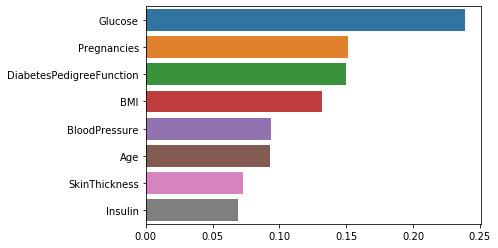

In [27]:
a = pd.Series(xgb_tuned.feature_importances_ , index= X_train.columns).sort_values(ascending = False)
sns.barplot(x=a , y=a.index)